<a href="https://colab.research.google.com/github/Nakulpradeep94/Car_Dekho-self-project-linear_regression-/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Machine learning/self project car dekho/Copy of CAR DETAILS FROM CAR DEKHO.csv")

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

there are no null values

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
len(df[df.duplicated()])

763

therefore there are duplicated values

In [ ]:
#removing duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [ ]:
len(df[df.duplicated()])

0

implying no more duplicate rows

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

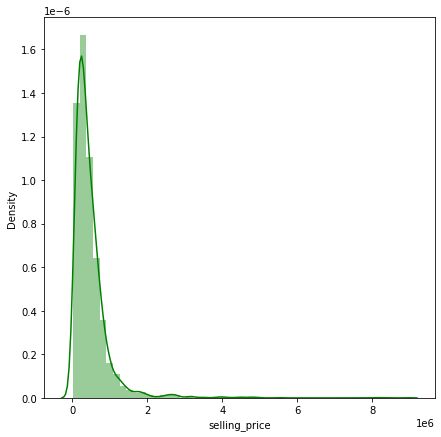

In [ ]:
# Dependent variable 'selling_price'
plt.figure(figsize=(7,7))
sns.distplot(df['selling_price'],color="g")

In [ ]:
df['selling_price'].skew()

5.453918181903924

we can see that the dependent variable is heavily positive skewed

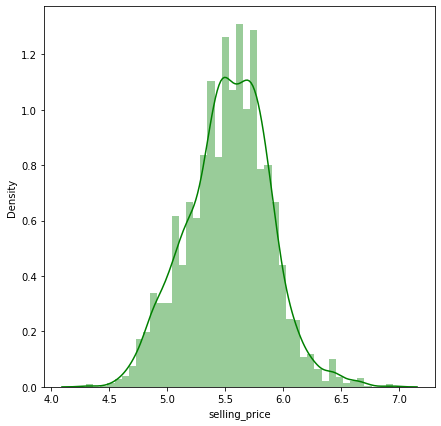

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['selling_price']),color="g")

In [ ]:
np.log10(df['selling_price']).skew()

-0.02295161301953189

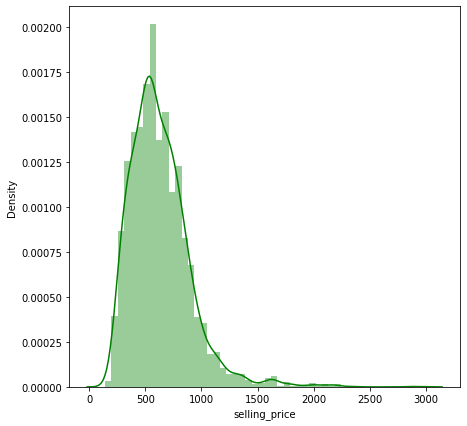

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['selling_price']),color="g")

In [ ]:
np.sqrt(df['selling_price']).skew()

1.7584155482653263

Compared to sqrt log transformation is better for getting normal distribution.we use log transformation as it looks better in distribution

**Splitting numerical and categorical columns**

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

# **Univariate analysis**

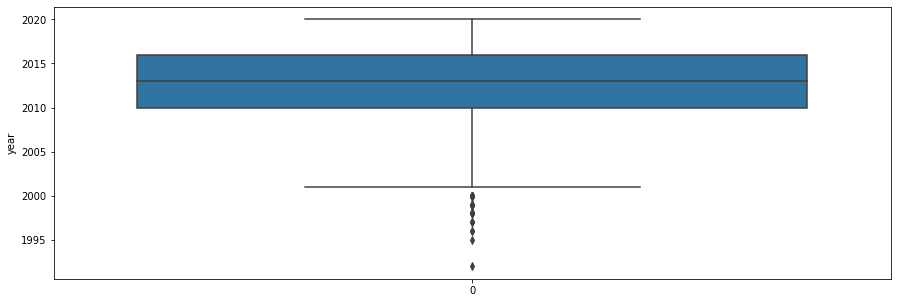

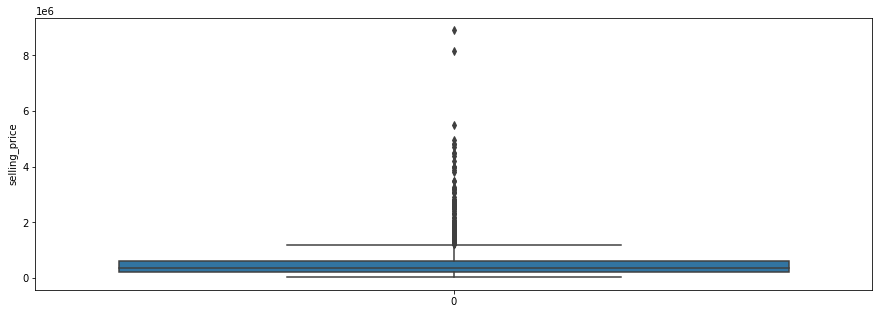

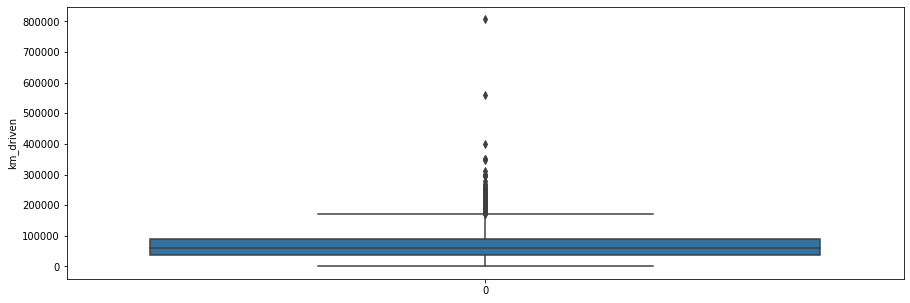

In [ ]:
for i in numeric_features:
  plt.figure(figsize = (15,5))
  sns.boxplot(data=df[i])
  plt.ylabel(i)
  plt.show()
  

From box plot we can see that there are outliers so we need to take care of it as they significantly affect our output.
And for linear regression we have to remove outliers

In [ ]:
#finding iqr for outlier removal for km driven
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

54000.0 171000.0 -45000.0


In [ ]:
df[df['km_driven']>UL]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
32,Audi Q5 2.0 TDI,2011,1190000,175900,Diesel,Dealer,Automatic,First Owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner
159,Chevrolet Enjoy 1.3 TCDi LS 8,2015,300000,175000,Diesel,Individual,Manual,First Owner
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner
...,...,...,...,...,...,...,...,...
4208,Toyota Qualis FS B3,2001,150000,256000,Diesel,Dealer,Manual,First Owner
4231,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2011,800000,230000,Diesel,Individual,Manual,First Owner
4255,Mahindra XUV500 W8 2WD,2014,650000,218000,Diesel,Individual,Manual,Second Owner
4286,Fiat Punto 1.3 Emotion,2010,130000,210000,Diesel,Individual,Manual,Second Owner


These are the outliers and has to be removed for better accuracy

In [ ]:
#trimming as we are removing all outliers
#changing our dataframe
new_df=df[df['km_driven']<UL]

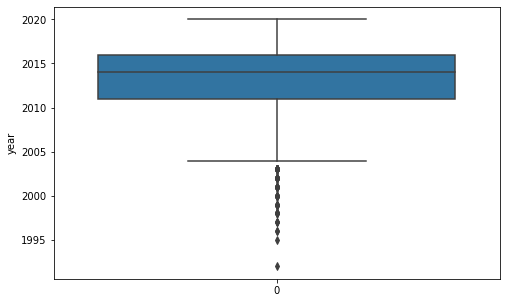

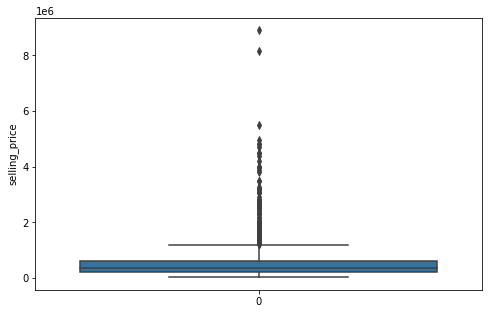

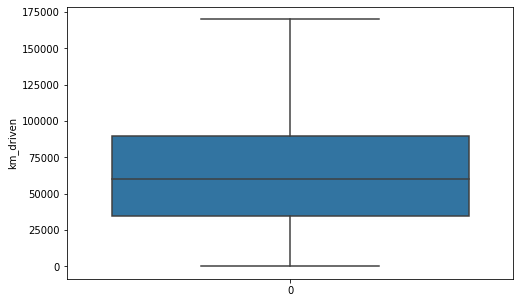

In [ ]:
for i in numeric_features:
  plt.figure(figsize = (8,5))
  sns.boxplot(data=new_df[i])
  plt.ylabel(i)
  plt.show()
  

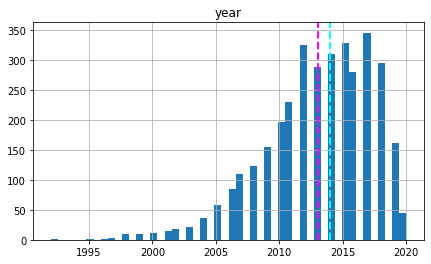

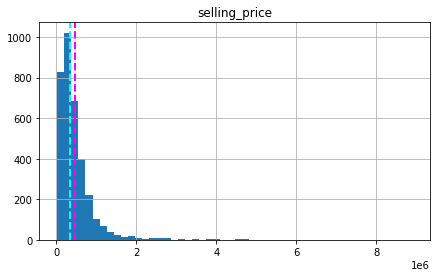

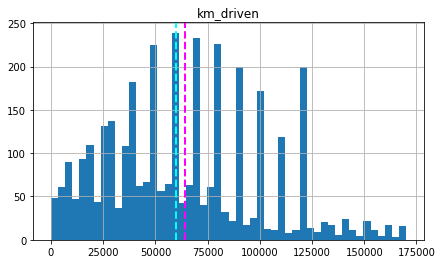

In [ ]:
#Creating bar plot for each numerical variable
for col in numeric_features[:]:
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    feature = new_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
#finding iqr for outlier removal for km driven
q1 = new_df['selling_price'].quantile(0.25)
q3 = new_df['selling_price'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

400000.0 1200000.0 -400000.0


In [ ]:
#as we dont want to loose more than 3% of data
new_df['selling_price'].quantile(0.94)

1100000.0

In [ ]:
#Capping as we are not removing all outliers
new_df[new_df['selling_price']>new_df['selling_price'].quantile(0.94)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
12,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner
35,Audi A6 2.0 TDI Design Edition,2013,1735000,50000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
4200,Ford Ecosport 1.5 Diesel Titanium Plus,2019,1250000,6590,Diesel,Dealer,Manual,First Owner
4204,Ford Endeavour 3.2 Titanium AT 4X4,2016,1800000,126000,Diesel,Dealer,Automatic,First Owner
4224,Toyota Fortuner 2.7 2WD AT,2016,2500000,70000,Petrol,Individual,Automatic,Second Owner
4228,Mahindra XUV500 W10 AWD,2015,1225000,70000,Diesel,Individual,Manual,First Owner


their selling price is very high bcoz they are sports cars so we have remove them.

In [ ]:
new_df=new_df[new_df['selling_price']<new_df['selling_price'].quantile(0.94)]

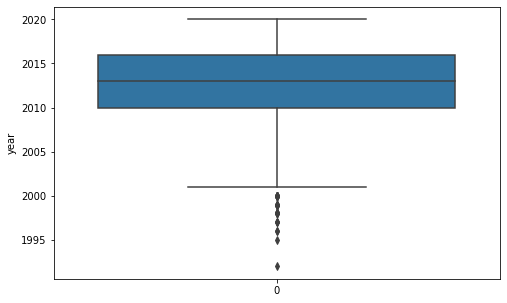

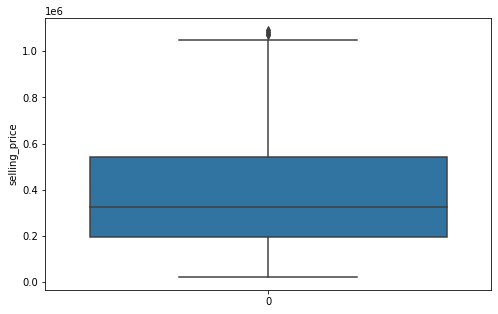

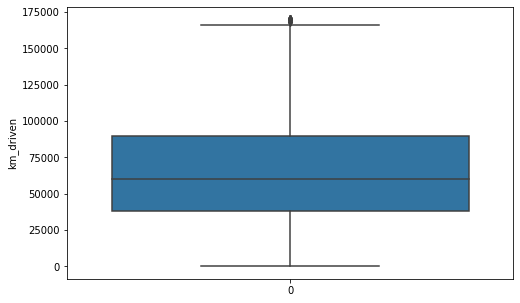

In [ ]:
for i in numeric_features:
  plt.figure(figsize = (8,5))
  sns.boxplot(data=new_df[i])
  plt.ylabel(i)
  plt.show()

In [ ]:
#finding iqr for outlier removal for year
q1 = new_df['year'].quantile(0.25)
q3 = new_df['year'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

6.0 2025.0 2001.0


In [ ]:
new_df[new_df['year']<1998]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
61,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner
631,Maruti Gypsy E MG410W ST,1995,95000,100000,Petrol,Individual,Manual,Second Owner
1669,Mahindra Jeep CL 500 MDI,1997,150000,120000,Diesel,Individual,Manual,Third Owner
2972,Mahindra Jeep MM 540,1996,200000,60000,Diesel,Individual,Manual,First Owner
3334,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
3550,Maruti Esteem AX,1997,79000,70000,Petrol,Individual,Automatic,First Owner
3661,Maruti 800 Std,1997,50000,80000,Petrol,Individual,Manual,Second Owner


In [ ]:
#Capping as we dont want want to remove all outliers
new_df=new_df[new_df['year']>2000]

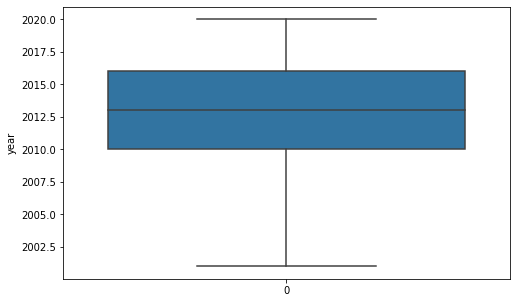

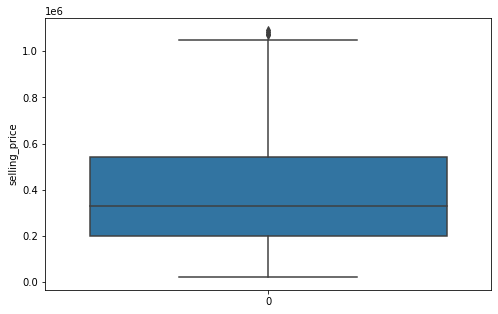

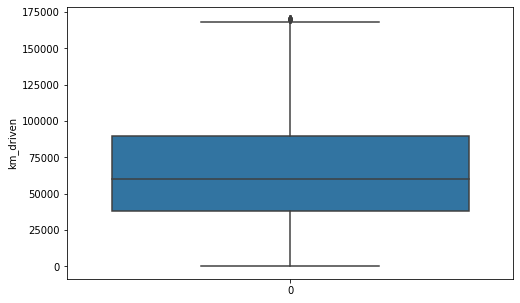

In [ ]:
for i in numeric_features:
  plt.figure(figsize = (8,5))
  sns.boxplot(data=new_df[i])
  plt.ylabel(i)
  plt.show()

Outlier treatment over

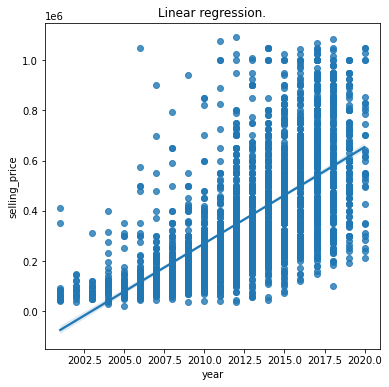

In [ ]:
#it gives lineplot for bestfit line
plt.figure(figsize=(6,6))
plt.title('Linear regression.')
sns.regplot(x=new_df['year'],y=new_df['selling_price'])

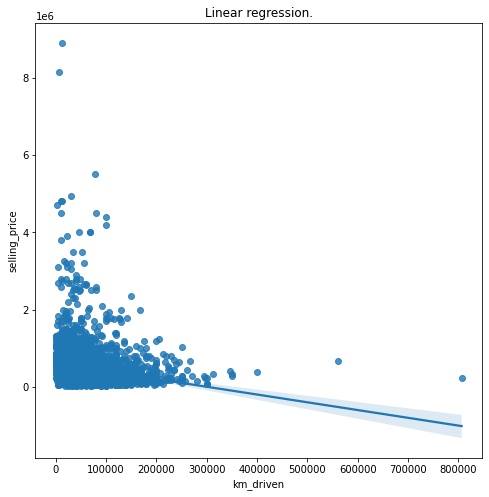

In [ ]:
#to check the variables follow linear assumption
plt.figure(figsize=(8,8))
plt.title('Linear regression.')
sns.regplot(x=df['km_driven'],y=df['selling_price'])

the above done to check for linearity of dependent variable with each of independent variable

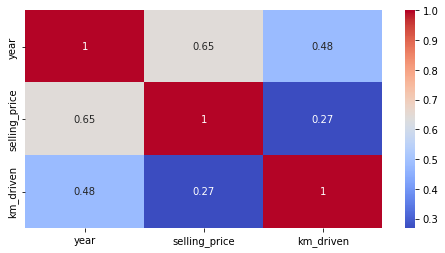

In [ ]:
 ## Correlation
plt.figure(figsize=(8,4))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

None of the numerical independent variable looks multicollinear

In [ ]:
#Multicollinearity(to remove others we can use VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,4.206788
1,km_driven,4.206788


The VIF values are less than 5 so not highly correlated.

In [ ]:
new_df.describe(include='all').columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
#code to get categorical columns
new_df.describe(include=['object','category']).columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [ ]:
categorical_features = new_df.describe(include=['object','category']).columns

In [ ]:
new_df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
new_df['name'].nunique()

1319

In [ ]:
new_df['name'].str.split(" ")[7]

['Tata', 'Indigo', 'Grand', 'Petrol']

In [ ]:
new_df['model'] = new_df['name'].str.split(" ", expand=True)[1]

In [ ]:
new_df['company'] = new_df['name'].str.split(" ", expand=True)[0]


In [ ]:
new_df['company'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Skoda', 'Toyota', 'Mercedes-Benz', 'Mahindra', 'Ford', 'Nissan',
       'Renault', 'Fiat', 'Volkswagen', 'Mitsubishi', 'Daewoo', 'Force',
       'OpelCorsa', 'BMW', 'Ambassador', 'Audi'], dtype=object)

In [ ]:
new_df['model'].unique()

array(['800', 'Wagon', 'Verna', 'RediGO', 'Amaze', 'Alto', 'Xcent',
       'Indigo', 'Creta', 'Celerio', 'Sail', 'Ciaz', 'Enjoy', 'Vitara',
       'City', 'Tigor', 'Superb', 'Corolla', 'E-Class', 'i10', 'Elantra',
       'Scorpio', 'Santro', 'Grand', 'Swift', 'Eeco', 'i20', 'Omni',
       'Indica', 'EON', 'Etios', 'Innova', 'EcoSport', 'Civic', 'Rapid',
       'Getz', 'Terrano', 'Elite', 'Brio', 'XUV500', 'Duster', 'Bolero',
       'Avventura', 'Jetta', 'SX4', 'Sonata', 'Micra', 'Xylo', 'KWID',
       'Ertiga', 'Beat', 'Zen', 'Baleno', 'Nano', 'Tavera', 'Cruze',
       'Figo', 'Spark', 'Bolt', 'Quanto', 'Nexon', 'Vento', 'Esteem',
       'Linea', 'Scala', 'S-Cross', 'Ameo', 'Optra', 'Mobilio', 'Zest',
       'Fabia', 'GO', 'Fiesta', 'Sumo', 'Jazz', 'Tiago', 'A-Star', 'Yeti',
       'Aspire', 'Outlander', 'Endeavour', 'Polo', 'Ritz', 'Estilo',
       'Manza', 'Safari', 'Fortuner', 'Ecosport', 'Supro', 'KUV', 'New',
       'Accord', 'TUV', 'BR-V', 'Ikon', 'Punto', 'WR-V', 'Laura', 'Pulse

In [ ]:
new_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,800,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Wagon,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Verna,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,RediGO,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Amaze,Honda


<Figure size 1440x432 with 0 Axes>

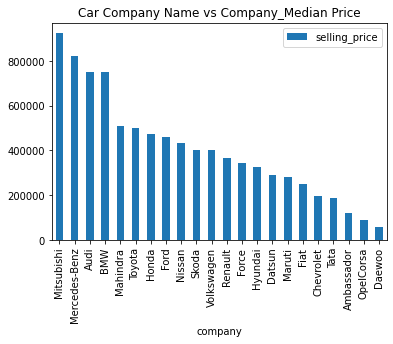

In [ ]:
#Company median price(Median price since distribution is skewed and as there are outliers)
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(new_df.groupby(['company'])['selling_price'].median().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Company_Median Price')
plt.show()

In [ ]:
df_autox.rename(columns={'selling_price':'company_price_median'},inplace=True)

In [ ]:
df_autox.head()

,company_price_median
company,
Mitsubishi,925000.0
Mercedes-Benz,822500.0
Audi,750000.0
BMW,750000.0
Mahindra,509999.0


In [ ]:
#Merging Company median price with our original dataframe
new_df = new_df.merge(df_autox,on = 'company',how = 'left')

In [ ]:
new_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model,company,company_price_median
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,800,Maruti,283000.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Wagon,Maruti,283000.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Verna,Hyundai,325000.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,RediGO,Datsun,290000.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Amaze,Honda,475000.0


<Figure size 21600x7200 with 0 Axes>

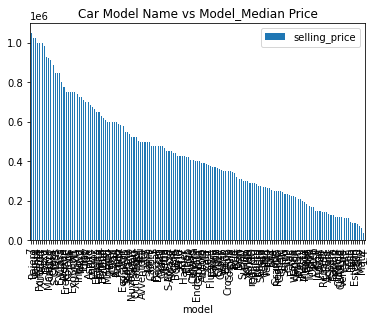

In [ ]:
#We know model also affects the price
#Model median price(Median price since distribution is skewed and as there are outliers)
plt.figure(figsize=(300, 100))

df_model = pd.DataFrame(new_df.groupby(['model'])['selling_price'].median().sort_values(ascending = False))
df_model.plot.bar()
plt.title('Car Model Name vs Model_Median Price')
plt.show()


In [ ]:
df_model.rename(columns={'selling_price':'model_price_median'},inplace=True)

In [ ]:
df_model.head()

,model_price_median
model,
7,1050000.0
Pajero,1025000.0
Venue,1025000.0
Santa,1000000.0
Fortuner,1000000.0


In [ ]:
#merging this to original dataframe
new_df = new_df.merge(df_model,on = 'model',how = 'left')

In [ ]:
new_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model,company,company_price_median,model_price_median
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,800,Maruti,283000.0,80000.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Wagon,Maruti,283000.0,221000.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Verna,Hyundai,325000.0,465000.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,RediGO,Datsun,290000.0,250000.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Amaze,Honda,475000.0,450000.0


We can see the model price median is giving closer value compared to company values

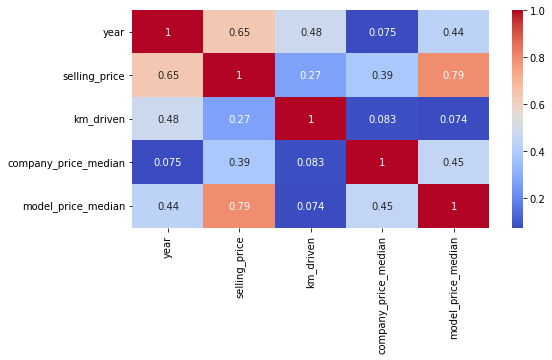

In [ ]:
plt.figure(figsize=(8,4))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Further proof that model price median is having better correlation with selling price

In [ ]:
#Multicollinearity(to remove others we can use VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,14.308033
1,km_driven,4.306641
2,company_price_median,14.637912
3,model_price_median,6.041320


Company pricemedian and year is having high vif ie greater than 10 so we have to remove the b4 applying linear regression

We will first try removing company_price_median as it is having high VIF,as model price median is also present

In [ ]:
new_df.drop(['company_price_median'],axis=1,inplace=True)

In [ ]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,8.500110
1,km_driven,4.230072
2,model_price_median,4.764515


WE can see that we are successful in reducing variance inflation factor

In [ ]:
new_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model,company,model_price_median
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,800,Maruti,80000.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Wagon,Maruti,221000.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Verna,Hyundai,465000.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,RediGO,Datsun,250000.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Amaze,Honda,450000.0


In [ ]:
#removing the name column which is no longer necessary
#new_df.drop(['name'],axis=1,inplace=True)

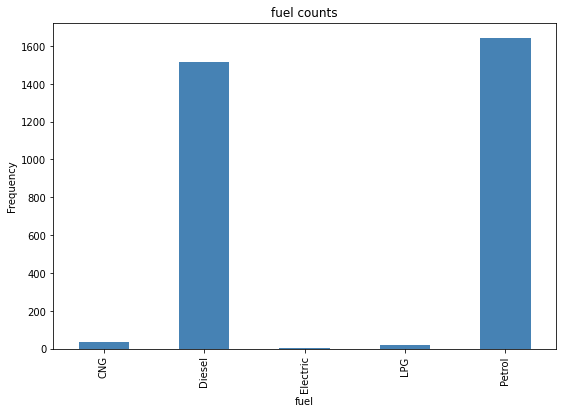

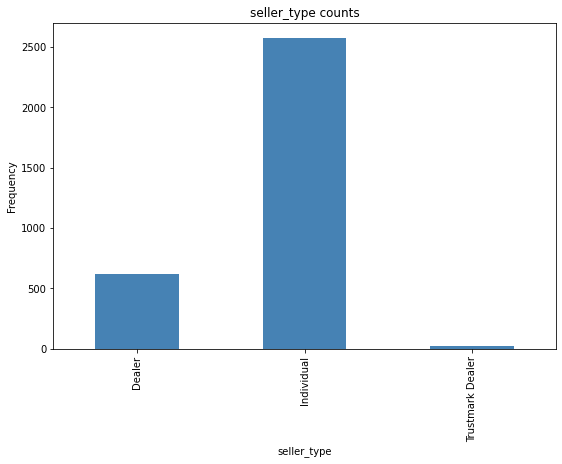

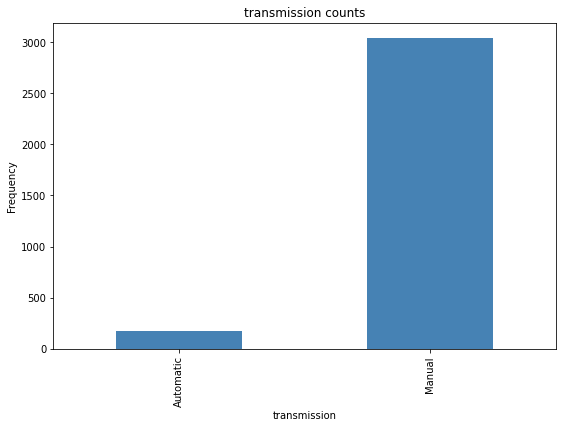

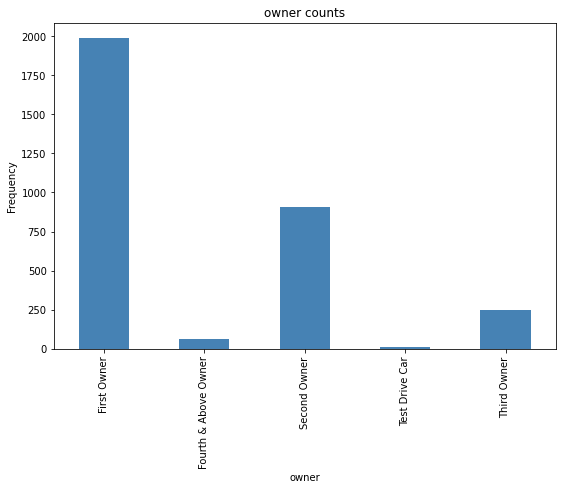

In [ ]:
#Categorical variables bar chart
for col in categorical_features[1:]:
    counts = new_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
new_df['fuel'].value_counts()

Petrol      1642
Diesel      1516
CNG           37
LPG           21
Electric       1
Name: fuel, dtype: int64

electric cng and lpg are very low in numbers.so we can add cng and lpg as same and remove electric 

In [ ]:
#Removing the electric from the rows to avoid discrepencies
new_df=new_df[new_df['fuel']!='Electric']

In [ ]:
new_df['fuel'].value_counts()

Petrol    1642
Diesel    1516
CNG         37
LPG         21
Name: fuel, dtype: int64

In [ ]:
def func_fuel(x):
  if x =='CNG'or x=='LPG':
    return 'CNG/LPG' 
  else:
    return x


In [ ]:
new_df['fuel']=new_df['fuel'].apply(func_fuel)

In [ ]:
new_df['fuel'].value_counts()

Petrol     1642
Diesel     1516
CNG/LPG      58
Name: fuel, dtype: int64

we will be doing hot encoding as there is no relationship with numbers fuel have ie it wouldnt be nice to give different numerical values like in a label encoding.

In [ ]:
new_df['seller_type'].value_counts()

Individual          2569
Dealer               620
Trustmark Dealer      27
Name: seller_type, dtype: int64

In [ ]:
#Function to convert seller column to individual and dealer
def seller_func(x):
  if x=='Individual':
    return x
  else:
    return 'Dealer'

In [ ]:
new_df['seller_type']=new_df['seller_type'].apply( seller_func)

In [ ]:
new_df['seller_type'].value_counts()

Individual    2569
Dealer         647
Name: seller_type, dtype: int64

In [ ]:
new_df['seller_type']

0       Individual
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
3212    Individual
3213    Individual
3214    Individual
3215    Individual
3216    Individual
Name: seller_type, Length: 3216, dtype: object

In [ ]:
new_df['transmission'].value_counts()

Manual       3041
Automatic     175
Name: transmission, dtype: int64

In [ ]:
new_df['owner'].value_counts()

First Owner             1987
Second Owner             905
Third Owner              250
Fourth & Above Owner      63
Test Drive Car            11
Name: owner, dtype: int64

Test drive car will cause error as values are very less so removing them

In [ ]:
new_df=new_df[new_df['owner']!='Test Drive Car']

In [ ]:
new_df['owner'].value_counts()

First Owner             1987
Second Owner             905
Third Owner              250
Fourth & Above Owner      63
Name: owner, dtype: int64

In [ ]:
final_df=pd.get_dummies(new_df,columns=['owner','transmission','seller_type','fuel'],drop_first = True) 

drop_first given so that the categorical variables wont have multicollinearity ie to avoid dummy trap

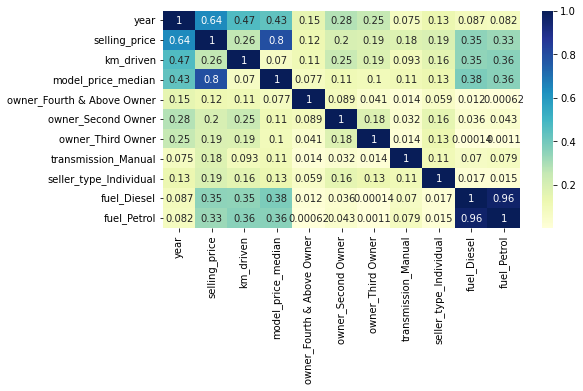

In [ ]:
plt.figure(figsize=(8,4))

sns.heatmap(abs(final_df.corr()), annot=True, cmap='YlGnBu')

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,year,86.891389
1,km_driven,5.920354
2,model_price_median,6.124598
3,owner_Fourth & Above Owner,1.074833
4,owner_Second Owner,1.672980
5,owner_Third Owner,1.247185
6,transmission_Manual,19.015935
7,seller_type_Individual,5.468724
8,fuel_Diesel,27.871370
9,fuel_Petrol,29.488497


In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['selling_price','fuel_Petrol','transmission_Manual','owner_Fourth & Above Owner']]])

,variables,VIF
0,year,12.917335
1,km_driven,5.747108
2,model_price_median,5.991325
3,owner_Second Owner,1.629921
4,owner_Third Owner,1.229516
5,seller_type_Individual,5.403191
6,fuel_Diesel,2.660784


In [ ]:
final_df.head()

,name,year,selling_price,km_driven,model,company,model_price_median,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,transmission_Manual,seller_type_Individual,fuel_Diesel,fuel_Petrol
0,Maruti 800 AC,2007,60000,70000,800,Maruti,80000.0,0,0,0,1,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Wagon,Maruti,221000.0,0,0,0,1,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Verna,Hyundai,465000.0,0,0,0,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,RediGO,Datsun,250000.0,0,0,0,1,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Amaze,Honda,450000.0,0,1,0,1,1,1,0


In [ ]:
final_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'model', 'company',
       'model_price_median', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Third Owner', 'transmission_Manual',
       'seller_type_Individual', 'fuel_Diesel', 'fuel_Petrol'],
      dtype='object')

In [ ]:
#using log transformation as it makes it less skewed
y = np.log10(final_df['selling_price'])

In [ ]:
from scipy.stats import zscore
X=final_df[['year','km_driven','model_price_median','owner_Second Owner', 'owner_Third Owner','seller_type_Individual', 'fuel_Diesel']].apply(zscore)

applying zscore ie standardisation because it doesnot get affected by outliers

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state =0)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(2564, 7)
(641, 7)
(641,)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7994733520556396

In [ ]:
reg.coef_

array([ 0.14162803, -0.00801152,  0.15130125, -0.00191064, -0.01089275,
       -0.02404438,  0.04012559])

In [ ]:
len(reg.coef_)

7

In [ ]:
reg.intercept_

5.490205137270236

In [ ]:
y_pred_train=reg.predict(X_train)

In [ ]:
r2_train = r2_score(10**(y_train), 10**(y_pred_train))

In [ ]:
r2_train

0.6977797617129537

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([5.49447815, 5.30730788, 5.20542458, 5.77811386, 5.74983822,
       5.43798359, 5.41015737, 5.26796438, 5.69811124, 5.37352642,
       5.28682849, 5.89378762, 5.64342274, 5.04251242, 5.4287889 ,
       5.41539666, 6.06942056, 5.93807798, 5.10344462, 5.61501664,
       5.56565099, 5.63009641, 5.5257642 , 5.67594752, 5.31874067,
       4.99697978, 5.34400757, 5.42409671, 5.74978214, 5.4413886 ,
       5.53330614, 5.1613292 , 5.6446381 , 5.53341863, 5.51924875,
       4.91158945, 5.53582341, 5.21201963, 5.70122906, 5.39956504,
       5.25308795, 5.16976446, 5.45112997, 5.38861972, 5.34915224,
       5.663028  , 5.70650545, 5.77715256, 5.36273819, 5.80701167,
       5.59571252, 5.36437688, 5.10806532, 5.03359984, 5.53776833,
       5.89132345, 5.63492028, 5.18794082, 5.01681896, 5.40368241,
       5.92269302, 5.49579546, 4.88631604, 5.46945258, 5.77177813,
       5.44388889, 5.31459321, 5.43507613, 5.54676384, 5.65246024,
       5.79943156, 5.23429689, 5.63794151, 5.54606077, 5.72827

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  =mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 15248171278.362408
RMSE : 123483.48585281518


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7283501502913554
Adjusted R2 :  0.7253461235173262


In [ ]:
# compare the actual output values for X_test with the predicted values

check_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
check_df

,Actual,Predicted
536,5.602060,5.494478
663,5.397940,5.307308
499,5.000000,5.205425
1158,5.763428,5.778114
2583,5.736397,5.749838
...,...,...
1787,5.653213,5.728137
702,5.113943,5.275447
2270,5.845098,5.701064
836,5.812913,5.667217


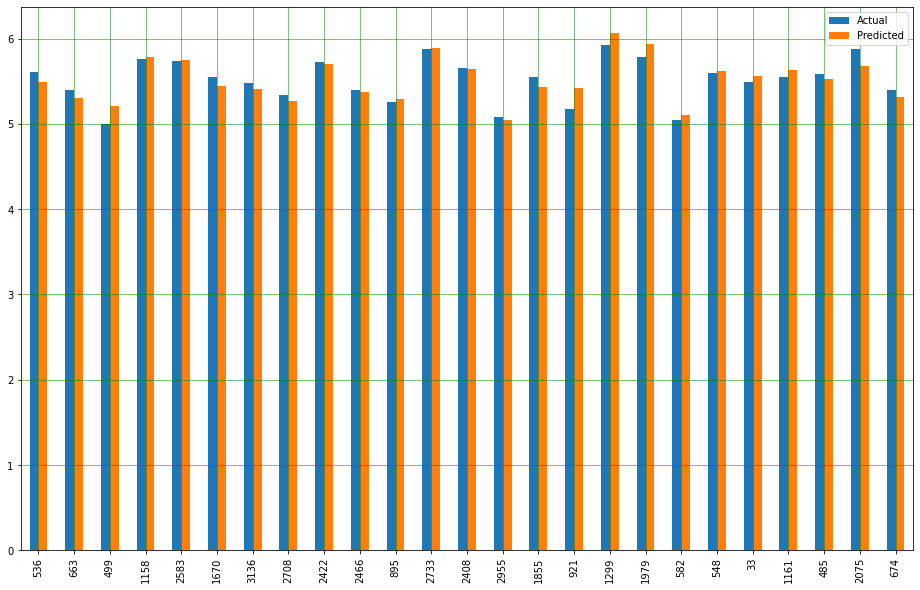

In [ ]:
#Showing the difference between the actual and predicted value

df1 = check_df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

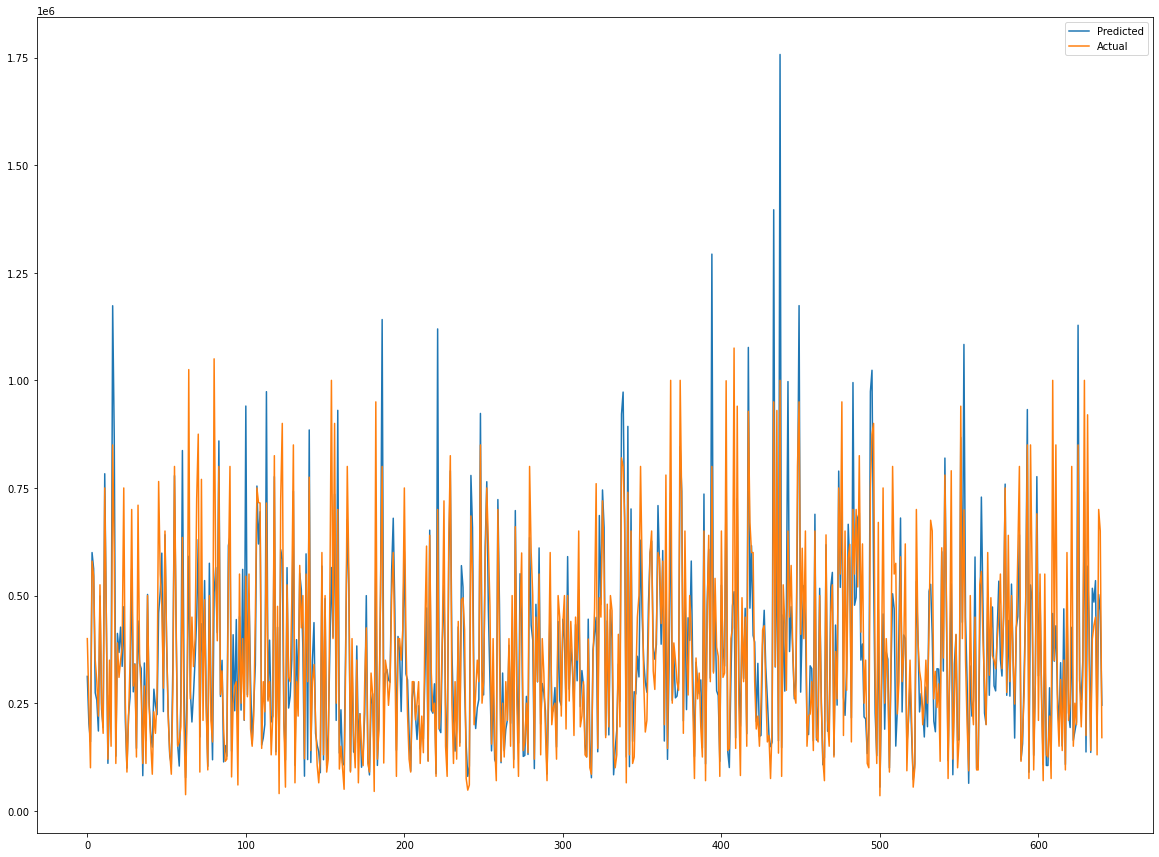

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7994728276621592

In [ ]:
lasso.coef_

array([ 0.14167072, -0.0078957 ,  0.15127177, -0.00181649, -0.01079511,
       -0.02398665,  0.03999201])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.018735122033912813


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

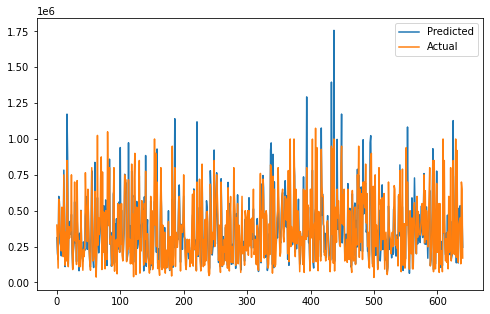

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 15248171278.362276
RMSE : 123483.48585281466
R2 : 0.7283501502913579
Adjusted R2 :  0.7253461235173286


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.018763500598586873


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 15198255266.924425
RMSE : 123281.20402934271
R2 : 0.729239416076586
Adjusted R2 :  0.7262452232053951


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.7321059273990018

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 17551861592.2151
RMSE : 132483.4389356462
R2 : 0.6873093516205425
Adjusted R2 :  0.6838514771518913


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15, 'l1_ratio': 0.3}

Using  {'alpha': 1e-15, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.01873512203391281


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 15248171278.362352
RMSE : 123483.48585281496
R2 : 0.7283501502913565
Adjusted R2 :  0.7253461235173273


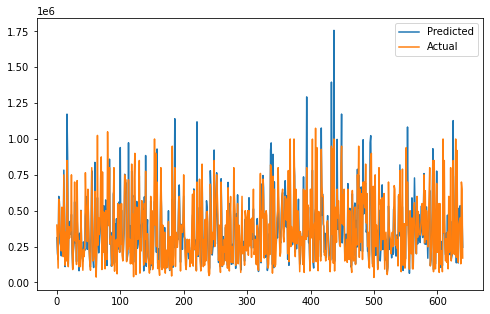

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Conclusion**



---
From above model we can conclude that below point:

*  Automatic vehicles fetch higher resale price compared to manual ones.
*  Age of the vehicle seems to show negative correlation with selling price.
* Past_Owners and Kms_Driven are showing very less correlation with selling price.
*  Resale value of cars with Fuel type CNG is higher as comapre to other.
* Average price of a car directly influences Selling Price prediction.Both are highly correlated and here directly proportional to each other.